## Convert, clean, and analyse data



Having scraped and shared the specific data required by the executives, claims department, and clients of your organisation, we now need to share it with them.WE know that none of the stakeholders involved are as tech- or data-savvy as we are, and that you need to share the data with them in a way they can understand and use. To this end, you’ve been asked to download your scraped data as a CSV file. 

Additionally, other data analysts at your organisation want access to your data, and have requested the data also be shared as JSON files. Your analytics department has also asked you to focus on the six continents on the table, and perform several calculations for each of them.

## 1. Import the libraries

In [61]:
#import necessary packages
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
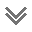

In [62]:
# create a url variable
url = 'https://www.worldometers.info/coronavirus/'

# create a requests variable
r = requests.get(url)

# make contact with website
if r.status_code == 200:
    html_doc = r.text
    
# get BeautifulSoup object
soup = BeautifulSoup(html_doc)

# print output
print(soup.prettify())

## 3. Extract tabular data

In [63]:
# Extracting the contents of the table with the table id: 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [64]:
# Now wee need to specify beautiful soup to go through the table and find everything 
# with a tr tag.
# note = th(table header), tr = (table row) and td = table column
rows = table.find_all("tr", attrs={"style": ""})

rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>500,053,305</td>
 <td

In [65]:
# storage for the extracted data
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# create a for loop statement
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # extract the text within each element
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# create output
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '500,053,305',
  'Total Deaths': '+327,017',
  'New Deaths': '6,206,066',
  'Total Recovered': '+389',
  'New Recovered': '449,915,437',
  'Active Cases': '+409,754',
  'Serious, Critical': '43,931,802',
  'Tot Cases/ 1M pop': '45,445',
  'Deaths/ 1M pop': '64,152',
  'Total Tests': '796.2',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '82,103,067',
  'Total Deaths': '',
  'New Deaths': '1,012,461 ',
  'Total Recovered': '',
  'New Recovered': '79,959,456',
  'Active Cases': '',
  'Serious, Critical': '1,131,150',
  'Tot Cases/ 1M pop': '1,619',
  'Deaths/ 1M pop': '245,492',
  'Total Tests': '3,027',
  'Tests/ 1M pop': '992,034,056',
  'Population': '2,966,228'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,036,928',
  'Total Deaths': '',
  'New Deaths': '521,723 ',
  'Total Recovered': '',
  'New Recovered': '42,504,329',
  'Active Case

## 5. Convert extracted data into a Panda DataFrame

In [66]:
# create DataFrame directly from output
data = pd.DataFrame(output)

# view DataFrame
data.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  500,053,305     +327,017   6,206,066   
1             1         USA   82,103,067               1,012,461    
2             2       India   43,036,928                 521,723    
3             3      Brazil   30,161,205                 661,389    
4             4      France   26,972,867                 143,466    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +389   449,915,437     +409,754        43,931,802   
1                    79,959,456                      1,131,150   
2                    42,504,329                         10,876   
3                    29,076,974                        422,842   
4                    24,198,650                      2,630,751   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests Tests/ 1M pop Population  
0            45,445         64,152       796.2                           
1             1,619        245,492       3,027   992,034,056  2,966,228  
2               698         30,652         372   794,118,951    565,591  
3             8,318        140,130       3,073    63,776,166    296,306  
4             1,541        411,614       2,189   260,504,402  3,975,375

## 6. Convert, clean and analyse the data

In [67]:
# save DataFrame as CSV file without index
data.to_csv('cases.csv', index=False)

In [68]:
# create a JSON file
import json

# create JSON file
output_json = json.dumps(output)

# view output
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "500,053,305", "Total Deaths": "+327,017", "New Deaths": "6,206,066", "Total Recovered": "+389", "New Recovered": "449,915,437", "Active Cases": "+409,754", "Serious, Critical": "43,931,802", "Tot Cases/ 1M pop": "45,445", "Deaths/ 1M pop": "64,152", "Total Tests": "796.2", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "82,103,067", "Total Deaths": "", "New Deaths": "1,012,461 ", "Total Recovered": "", "New Recovered": "79,959,456", "Active Cases": "", "Serious, Critical": "1,131,150", "Tot Cases/ 1M pop": "1,619", "Deaths/ 1M pop": "245,492", "Total Tests": "3,027", "Tests/ 1M pop": "992,034,056", "Population": "2,966,228"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "43,036,928", "Total Deaths": "", "New Deaths": "521,723 ", "Total Recovered": "", "New Recovered": "42,504,329", "Active Cases": "", "Serious, Critical": "10,876", "Tot Cases/ 1M pop": "698", 

In [69]:
# save the json file to .json
with open("cases_json.json", "w") as f:
    json.dump(output, f)

In [70]:
# read json using pandas, output to .csv
pd.read_json(output_json).to_csv("cases_csv.csv", index=False)

In [71]:
# import and read CSV file
data_csv = pd.read_csv("cases_csv.csv")

# view the data
print(data_csv.head())

# import and read JSON file
data_json = pd.read_json("cases_json.json")

# view the data
data_json.head()

   Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0            NaN       World  500,053,305     +327,017   6,206,066   
1            1.0         USA   82,103,067          NaN  1,012,461    
2            2.0       India   43,036,928          NaN    521,723    
3            3.0      Brazil   30,161,205          NaN    661,389    
4            4.0      France   26,972,867          NaN    143,466    

   Total Recovered New Recovered Active Cases Serious, Critical  \
0            389.0   449,915,437     +409,754        43,931,802   
1              NaN    79,959,456          NaN         1,131,150   
2              NaN    42,504,329          NaN            10,876   
3              NaN    29,076,974          NaN           422,842   
4              NaN    24,198,650          NaN         2,630,751   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests Tests/ 1M pop Population  
0            45,445         64,152       796.2           NaN        NaN  
1             1,619        2

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  500,053,305     +327,017   6,206,066   
1             1         USA   82,103,067               1,012,461    
2             2       India   43,036,928                 521,723    
3             3      Brazil   30,161,205                 661,389    
4             4      France   26,972,867                 143,466    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +389   449,915,437     +409,754        43,931,802   
1                    79,959,456                      1,131,150   
2                    42,504,329                         10,876   
3                    29,076,974                        422,842   
4                    24,198,650                      2,630,751   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests Tests/ 1M pop Population  
0            45,445         64,152       796.2                           
1             1,619        245,492       3,027   992,034,056  2,966,228  
2               698         30,652         372   794,118,951    565,591  
3             8,318        140,130       3,073    63,776,166    296,306  
4             1,541        411,614       2,189   260,504,402  3,975,375

In [75]:
# view CSV and JSON DataFrames
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered      float64
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

In [73]:
# create a subset
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

data_report.columns

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')

In [74]:
# determine missing values
data_report.isnull().sum()

Country,Other          2
Total Cases            0
Total Deaths         204
Total Recovered      210
Active Cases         202
Serious, Critical     15
dtype: int64

In [76]:
# save DataFrame as CSV file without index
data_report.to_csv('cases_report.csv', index=False)

In [77]:
# view saved CSV
cases_report = pd.read_csv('cases_report.csv')

cases_report.head()

Country,Other Total Cases Total Deaths  Total Recovered Active Cases  \
0            NaN       World     +327,017            389.0     +409,754   
1            1.0         USA          NaN              NaN          NaN   
2            2.0       India          NaN              NaN          NaN   
3            3.0      Brazil          NaN              NaN          NaN   
4            4.0      France          NaN              NaN          NaN   

  Serious, Critical  
0        43,931,802  
1         1,131,150  
2            10,876  
3           422,842  
4         2,630,751